In [1]:
#!/usr/bin/python3.10

Prerequisites: pandas, xlrd, matplotlib, rpy2

# HSMC modelling

## Configuration
### It is assumed that this notebook is run from StructureAnalysis/sequence_analysis/tutorials

**Import OpenAlea packages**

In [2]:
from openalea.stat_tool import _stat_tool
from openalea.sequence_analysis import _sequence_analysis
from openalea.sequence_analysis.hidden_semi_markov import HiddenSemiMarkov
from openalea.sequence_analysis.simulate import Simulate
from openalea.sequence_analysis.data_transform import Thresholding

from openalea.stat_tool.data_transform import *
from openalea.stat_tool.cluster import Cluster
from openalea.stat_tool.cluster import Transcode, Cluster

import openalea.stat_tool.plot #import DISABLE_PLOT
# openalea.stat_tool.plot.DISABLE_PLOT = True
from openalea.stat_tool.plot import DISABLE_PLOT
DISABLE_PLOT = False

import os

from openalea.stat_tool.output import plot, Plot

plot.DISABLE_PLOT = DISABLE_PLOT

from openalea.stat_tool.plot import get_plotter, mplotlib 

##### Check pandas version

In [3]:
# print pd.__version__

In [4]:
import xlrd
xlrd.__version__

'2.0.1'

##### Enabling R extensions

In [5]:
%load_ext rpy2.ipython

#####  Place variables in markdown outputs

In [6]:
from IPython.display import Markdown
from IPython.core.magic import register_cell_magic


@register_cell_magic
def markdown(line, cell):
    return Markdown(cell.format(**globals()))

## Determining if images have to be saved (not used for the moment)

## Loading and preparing data

In [7]:
import sys, os

In [8]:
sys.path

['/home/jdurand/devlp/Git/openalea/StructureAnalysis',
 '/home/jdurand/miniforge3/envs/openalea/lib/python310.zip',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10/lib-dynload',
 '',
 '/home/jdurand/.local/lib/python3.10/site-packages',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10/site-packages',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10/site-packages/OpenAlea.SConsX-2.4.0-py3.9.egg',
 '/home/jdurand/devlp/Git/openalea/StructureAnalysis/sequence_analysis/src',
 '/home/jdurand/devlp/Git/openalea/StructureAnalysis/stat_tool/src',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10/site-packages/openalea.deploy-3.1.2-py3.10.egg']

In [9]:
sys.path.append(".." + os.sep + "tutorials")

In [10]:
# TODO: fix this
# get_shared_data("data")

In [11]:
from pathlib import Path
data_path = Path(openalea.sequence_analysis.__path__[0])
data_path = str(Path.joinpath(data_path.parent.parent.parent.absolute(), "share","data"))


**Read an existing HSMC model**

In [12]:
model_file = "test_hidden_semi_markov_param.dat"

hsm = HiddenSemiMarkov(data_path + os.sep + model_file)

**Simulate sequences**

In [13]:
from openalea.sequence_analysis import Simulate

Simulate *nb_seq* sequences with length *seq_length*

In [14]:
nb_seq = 30
seq_length = 100
seq = hsm.simulation_nb_sequences(nb_seq, seq_length, True)
assert(len(seq) == nb_seq)
assert(len(seq[0]) == seq_length)
# NB: hsm has 1 output process but simulation includes the hidden state
assert(len(seq[0][1]) == 2)


N.o. initial states in parallel: 0


In [15]:
seq = hsm.simulation_nb_sequences(nb_seq, seq_length, True)


N.o. initial states in parallel: 0


In [16]:
# Print first simulated sequence.
# First variable is the simulated state
print(seq[0])

[[2, 16], [2, 24], [2, 20], [2, 8], [2, 13], [2, 15], [2, 24], [2, 13], [2, 9], [2, 14], [2, 17], [2, 13], [2, 19], [2, 21], [2, 19], [2, 13], [2, 5], [2, 13], [2, 16], [2, 11], [2, 18], [2, 8], [2, 16], [2, 13], [2, 30], [2, 17], [0, 1], [2, 27], [2, 24], [2, 10], [2, 6], [2, 12], [2, 17], [2, 25], [2, 16], [2, 19], [2, 14], [2, 10], [2, 37], [2, 8], [1, 6], [1, 15], [1, 2], [1, 12], [1, 4], [1, 8], [1, 15], [1, 8], [1, 15], [2, 11], [2, 13], [2, 18], [2, 11], [2, 18], [2, 18], [2, 9], [2, 20], [2, 18], [2, 13], [2, 14], [2, 17], [2, 23], [0, 1], [0, 1], [1, 10], [1, 6], [1, 15], [1, 11], [1, 5], [1, 3], [1, 7], [1, 5], [1, 10], [1, 7], [1, 5], [1, 3], [1, 8], [1, 8], [1, 10], [1, 11], [1, 5], [1, 6], [1, 14], [1, 2], [0, 1], [1, 7], [1, 8], [1, 4], [1, 8], [2, 15], [2, 10], [2, 11], [2, 13], [2, 15], [2, 13], [2, 23], [2, 20], [2, 10], [2, 14], [2, 9]]


Discard variable 1 (state)

In [17]:
obs = seq.select_variable([1], keep=False)

## Plotting marginal probabilities of data

In [18]:
# Variable 1
# obs.plot("Intensity", 1)

## HSCM re-estimation

### Reestimate from default initialisation

In [19]:
from openalea.sequence_analysis import Estimate

nb_states = 3
seq_estim = seq.select_variable([2], True)

# TODO: why are two states the same?
# TODO: set seed
hsmc_est = Estimate(seq_estim, "HIDDEN_SEMI-MARKOV", "Ordinary", nb_states, "Irreducible", Nbiteration=300)   
print(hsmc_est.display())

0
HIDDEN_SEMI-MARKOV_CHAIN

3 STATES

INITIAL_PROBABILITIES
1e-05       0.419789    0.580201    

TRANSITION_PROBABILITIES
0           0.00798562  0.992014    
0.00112332  0           0.998877    
0.0266267   0.973373    0           

recurrent class: states 0 1 2

time up to the first occurrence of state 0 distribution
mean: 401.611   median: 570   mode: 3
variance: 77234.3   standard deviation: 277.911   lower quartile: 238   upper quartile: -1

time up to the first occurrence of state 0 frequency distribution - sample size: 2
mean: 53   median: 16.5   mode: 16
variance: 2738   standard deviation: 52.3259   lower quartile: 16   upper quartile: 90

time up to the first occurrence of state 1 distribution
mean: 4.22157   median: 2   mode: 0
variance: 31.2414   standard deviation: 5.5894   lower quartile: 0   upper quartile: 7

time up to the first occurrence of state 1 frequency distribution - sample size: 30
mean: 4.73333   median: 1   mode: 0
variance: 40.6851   standard deviation: 6.

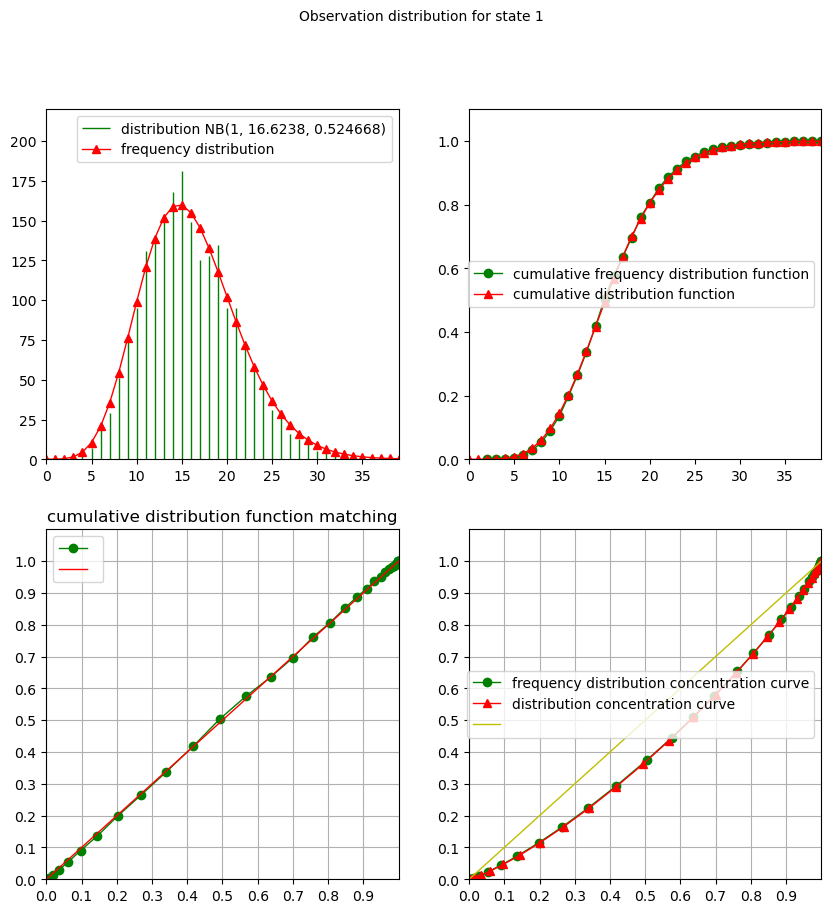

In [20]:
from openalea.sequence_analysis import seq_map
hsmc_est.extract(seq_map['Observation'],1,1).plot(Title="Observation distribution for state 1")

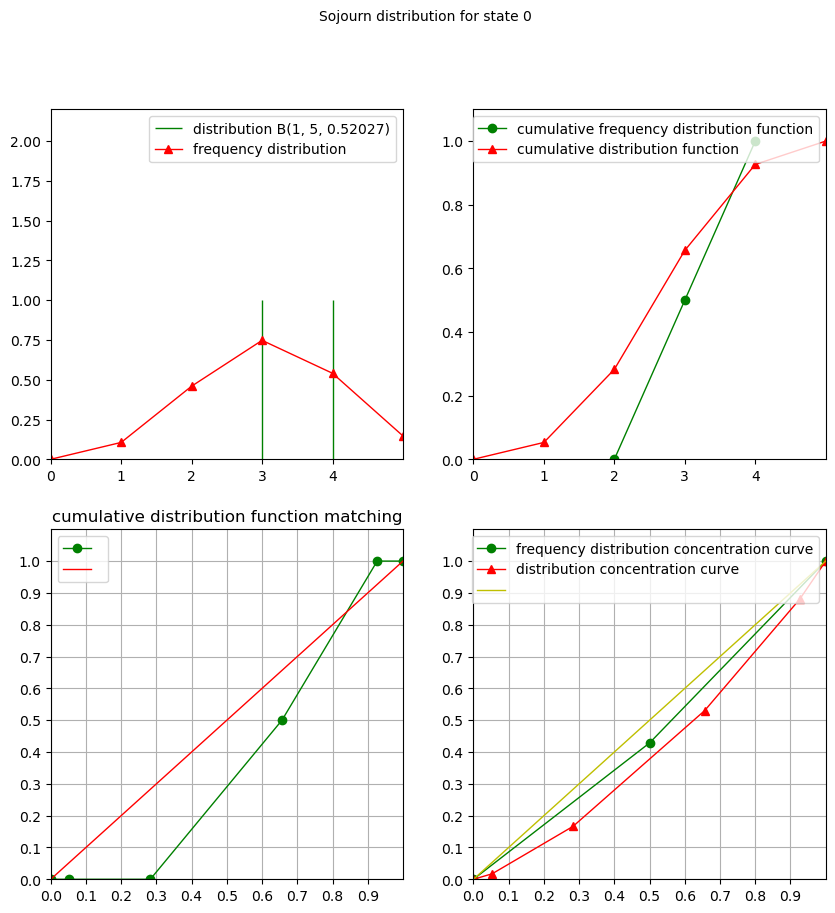

In [21]:
hsmc_est.extract(seq_map['Sojourn'],0,0).plot(Title="Sojourn distribution for state 0")

### Reestimate from file for initialisation

In [22]:
hsmc_est_file = Estimate(seq_estim, "HIDDEN_SEMI-MARKOV", hsm, Nbiteration=300)   
print(hsmc_est.display())

0
iteration 1   log-likelihood for the observed sequences: -9229.01
iteration 2   log-likelihood for the observed sequences: -1e+37


Exception: *** ERROR : estimation failure
